In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# from google.colab import drive
# drive.mount("/content/drive")

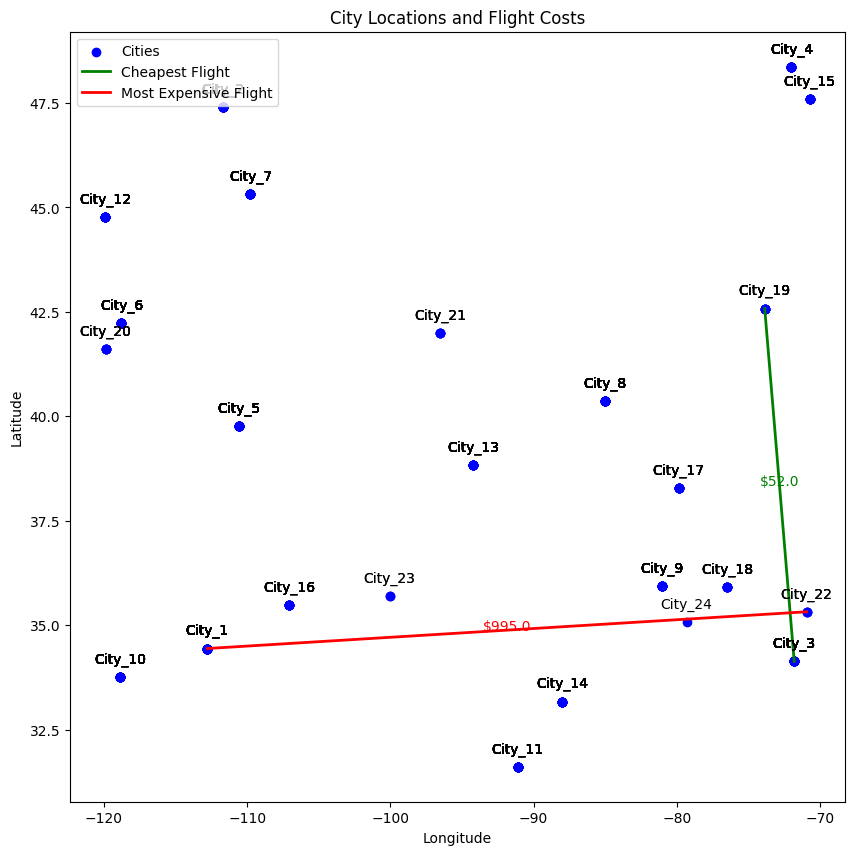

In [10]:
# ---
# Group No. 13
# 1. อชิระ ชัชวาลย์6210450385
# 2. อภิสิทธิ์ แสงสารพันธ์ 6210450393
# 3. รัศมีดาว สุทธิศรี 6210450971

group = 13 # อย่าลืมเปลี่ยนเลขกลุ่ม
problem = 5 # ปัญหาที่
data_num = 5 # ชุดข้อมูลที่

# ชุดข้อมูลเก็บใน /in
in_path = "./dataset/P"+str(problem)+"/in/"
data_path = in_path+"p"+str(problem)+"_input_dataset_"+str(data_num)+".csv"

# ผลลัพธ์เก็บใน /out
out_path = "./dataset/P"+str(problem)+"/out/"
result_path = out_path+"p"+str(problem)+"_group"+str(group)+"-output"+str(data_num)+".csv"
png_path = out_path+"p"+str(problem)+"_group"+str(group)+"_plot"+str(data_num)+".png"

# อ่านข้อมูล
data = pd.read_csv(data_path)

# --- เริ่มเขียนโค้ดตรงนี้ ---

cheapest_flight = data.loc[data['AirFarePrice'].idxmin()]
most_expensive_flight = data.loc[data['AirFarePrice'].idxmax()]
plt.figure(figsize=(10, 10))
plt.scatter(data['OriginLong'], data['OriginLat'], label='Cities', color='blue')
for index, row in data.iterrows():
    plt.annotate(row['OriginCity'], (row['OriginLong'], row['OriginLat']),
                 textcoords="offset points", xytext=(0,10), ha='center')

plt.plot([cheapest_flight['OriginLong'], cheapest_flight['DestLong']],
         [cheapest_flight['OriginLat'], cheapest_flight['DestLat']],
         'g-', label='Cheapest Flight', linewidth=2)
plt.plot([most_expensive_flight['OriginLong'], most_expensive_flight['DestLong']],
         [most_expensive_flight['OriginLat'], most_expensive_flight['DestLat']],
         'r-', label='Most Expensive Flight', linewidth=2)
plt.text((cheapest_flight['OriginLong'] + cheapest_flight['DestLong']) / 2,
         (cheapest_flight['OriginLat'] + cheapest_flight['DestLat']) / 2,
         f"${cheapest_flight['AirFarePrice']}", color='green', ha='center')
plt.text((most_expensive_flight['OriginLong'] + most_expensive_flight['DestLong']) / 2,
         (most_expensive_flight['OriginLat'] + most_expensive_flight['DestLat']) / 2,
         f"${most_expensive_flight['AirFarePrice']}", color='red', ha='center')

# Set labels and title for the plot
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('City Locations and Flight Costs')
plt.legend()
# --- สิ้นสุดโค้ดตรงนี้ ---

# เซฟผลลัพธ์
data.to_csv(result_path, index=False)

# แสดงผลลัพธ์
data.head()

# เซฟกราฟ
plt.savefig(png_path, dpi=100)

# แสดงผลกราฟ
plt.show()